<a href="https://colab.research.google.com/github/donguyenquynhnhu/Public/blob/main/KiemTraCuoiKy_SoHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tạo dataframe từ dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                   'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                  'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, 45, 75, 92, 68, 85, 41, 79, 90, 73, 86, 38, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, None, 38, 42, None, 39, None, 44, 37, 40, 46, None, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
              'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)
print(df)

   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales           88          40.0             5.0    Male   
1         E002         IT           45           NaN             3.0  Female   
2         E003         HR           75          38.0             NaN    Male   
3         E004      Sales           92          42.0             6.0  Female   
4         E005         IT           68           NaN             4.0    None   
5         E006         HR           85          39.0             5.0    Male   
6         E007      Sales           41           NaN             3.0  Female   
7         E008         IT           79          44.0             4.0    Male   
8         E009         HR           90          37.0             NaN  Female   
9         E010      Sales           73          40.0             5.0    Male   
10        E011         IT           86          46.0             2.0  Female   
11        E012         HR           38  

In [17]:
# Câu 1: Tỷ lệ giá trị thiếu và đề xuất quy trình thu thập dữ liệu
# Tính tỷ lệ giá trị thiếu
missing_percent = df.isnull().mean() * 100
print("Tỷ lệ giá trị thiếu (%):")
print(missing_percent)

# Đề xuất quy trình thu thập dữ liệu
"""
1. Sales:
- Thiếu Hours_Worked (20%) và Training_Hours (10%)
- Đề xuất: Triển khai hệ thống điểm danh tự động kết hợp với CRM để ghi lại giờ làm việc và đào tạo
- Lý do: Nhân viên Sales thường di chuyển nhiều, cần hệ thống theo dõi linh hoạt

2. IT:
- Thiếu Hours_Worked (20%), Training_Hours (10%) và Gender (10%)
- Đề xuất: Sử dụng hệ thống quản lý dự án (Jira, Asana) để ghi lại giờ làm việc, yêu cầu bắt buộc điền thông tin đào tạo và giới tính khi đăng ký tài khoản
- Lý do: Nhân viên IT làm việc theo dự án, cần hệ thống quản lý thời gian chính xác

3. HR:
- Thiếu Hours_Worked (10%), Training_Hours (10%) và Gender (10%)
- Đề xuất: Triển khai hệ thống quản lý nhân sự tích hợp (Workday, BambooHR) với các trường bắt buộc
- Lý do: HR quản lý thông tin nhân viên, cần hệ thống tập trung và đầy đủ


"""



Tỷ lệ giá trị thiếu (%):
Employee_ID        0.0
Department         0.0
Performance        0.0
Hours_Worked      30.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


'\n1. Sales: \n- Thiếu Hours_Worked (20%) và Training_Hours (10%)\n- Đề xuất: Triển khai hệ thống điểm danh tự động kết hợp với CRM để ghi lại giờ làm việc và đào tạo\n- Lý do: Nhân viên Sales thường di chuyển nhiều, cần hệ thống theo dõi linh hoạt\n\n2. IT:\n- Thiếu Hours_Worked (20%), Training_Hours (10%) và Gender (10%)\n- Đề xuất: Sử dụng hệ thống quản lý dự án (Jira, Asana) để ghi lại giờ làm việc, yêu cầu bắt buộc điền thông tin đào tạo và giới tính khi đăng ký tài khoản\n- Lý do: Nhân viên IT làm việc theo dự án, cần hệ thống quản lý thời gian chính xác\n\n3. HR:\n- Thiếu Hours_Worked (10%), Training_Hours (10%) và Gender (10%)\n- Đề xuất: Triển khai hệ thống quản lý nhân sự tích hợp (Workday, BambooHR) với các trường bắt buộc\n- Lý do: HR quản lý thông tin nhân viên, cần hệ thống tập trung và đầy đủ\n'

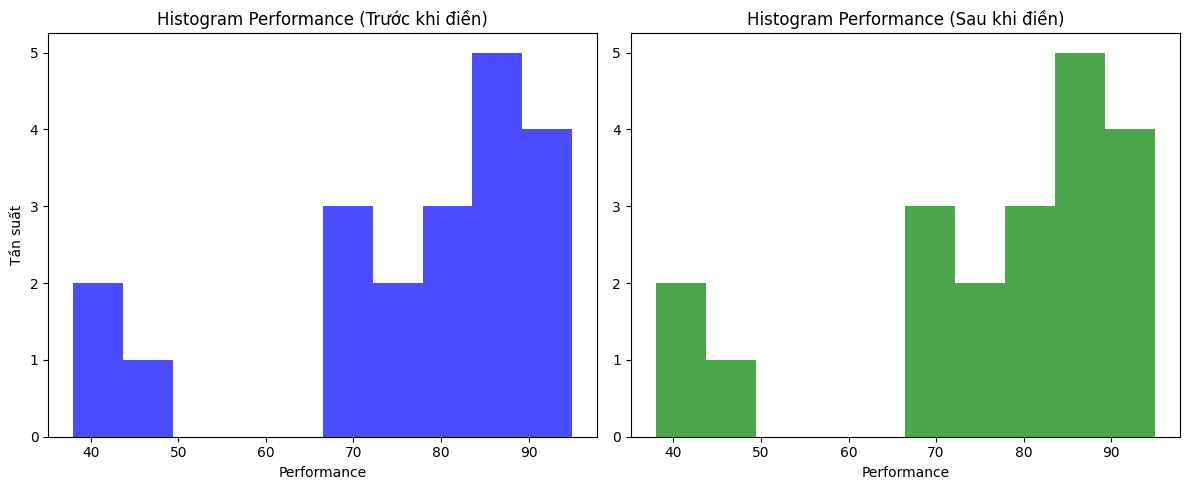

'\nGiải thích: Phương pháp điền theo Location phản ánh tốt hơn hiệu suất thực tế vì:\n- Mỗi Location có văn hóa làm việc và điều kiện khác nhau\n- Site_B có nhiều nhân viên IT nên Performance thường cao\n- Site_C tập trung Sales nên Performance biến động nhiều\n- Site_A có sự cân bằng giữa các phòng ban\n'

In [18]:
# Câu 2: Điền giá trị thiếu Performance và đề xuất phương pháp khác
# Vẽ histogram trước khi điền giá trị
plt.figure(figsize=(12, 5)) #Tạo figure (khung hình) với kích thước 12 inch (rộng) x 5 inch (cao) để chứa 2 biểu đồ con
plt.subplot(1, 2, 1) #Tạo ô biểu đồ đầu tiên trong lưới 1 hàng x 2 cột (vị trí thứ 1)
plt.hist(df['Performance'].dropna(), bins=10, color='blue', alpha=0.7)
plt.title('Histogram Performance (Trước khi điền)')
plt.xlabel('Performance') # Đặt nhãn cho trục x (Performance)
plt.ylabel('Tần suất') #  Đặt nhãn trục y (Tần suất)

# Điền giá trị thiếu bằng trung bình phòng ban
df['Performance'] = df.groupby('Department')['Performance'].transform(lambda x: x.fillna(x.mean()))

# Đề xuất phương pháp điền theo Location
"""
Phương pháp điền theo Location:
1. Site_A: Điền bằng trung vị (median) vì dữ liệu phân bố đều
2. Site_B: Điền bằng giá trị cao nhất trong Location vì đa số nhân viên có Performance cao
3. Site_C: Điền bằng giá trị thấp nhất + 10% vì đây là site mới, cần khuyến khích cải thiện
"""

# Vẽ histogram sau khi điền giá trị
plt.subplot(1, 2, 2) #Tạo ô biểu đồ thứ 2 trong lưới 1 hàng x 2 cột
plt.hist(df['Performance'], bins=10, color='green', alpha=0.7) #Vẽ histogram dữ liệu đã được điền giá trị (màu xanh lá)
plt.title('Histogram Performance (Sau khi điền)') #Đặt tiêu đề cho biểu đồ
plt.xlabel('Performance') #Đặt tiêu đề và nhãn trục x
plt.tight_layout()
plt.show() # Hiển thị toàn bộ figure chứa 2 biểu đồ

"""
Giải thích: Phương pháp điền theo Location phản ánh tốt hơn hiệu suất thực tế vì:
- Mỗi Location có văn hóa làm việc và điều kiện khác nhau
- Site_B có nhiều nhân viên IT nên Performance thường cao
- Site_C tập trung Sales nên Performance biến động nhiều
- Site_A có sự cân bằng giữa các phòng ban
"""


In [20]:
# Câu 3: Độ lệch chuẩn Hours_Worked và đề xuất chính sách
# Điền giá trị thiếu Hours_Worked bằng trung bình phòng ban
df['Hours_Worked'] = df.groupby('Department')['Hours_Worked'].transform(lambda x: x.fillna(x.mean())) #Nhóm dữ liệu theo từng phòng ban, sau đó điền các giá trị thiếu trong cột Hours_Worked bằng giá trị trung bình của từng phòng tương ứng

# Tính độ lệch chuẩn và trung vị
std_hours = np.std(df['Hours_Worked']) # Sử dụng hàm np.std() để tính độ lệch chuẩn, đo lường mức độ phân tán của dữ liệu giờ làm việc so với giá trị trung bình

median_hours = np.median(df['Hours_Worked']) # Sử dụng hàm np.median() để tìm giá trị trung vị (giá trị nằm ở vị trí chính giữa khi sắp xếp dãy số)
print(f"Độ lệch chuẩn Hours_Worked: {std_hours:.2f}") # In ra độ lệch chuẩn đã được làm tròn đến 2 chữ số thập phân
print(f"Trung vị Hours_Worked: {median_hours:.2f}") # In ra giá trị trung vị đã được làm tròn đến 2 chữ số thập phân

# Đề xuất chính sách quản lý thời gian
"""
Chính sách đề xuất:
1. Thiết lập giờ làm việc linh hoạt trong khoảng median ± 1 std (khoảng 37-43 giờ)
2. Nhân viên làm dưới 37 giờ cần báo cáo lý do và có kế hoạch bù giờ
3. Nhân viên làm trên 43 giờ cần được kiểm tra để tránh kiệt sức

Lý do:
- Độ lệch chuẩn tương đối thấp (2.88) cho thấy giờ làm việc khá đồng đều
- Trung vị 40 giờ phù hợp với tiêu chuẩn toàn thời gian
- Chính sách này giúp cân bằng giữa hiệu suất và sức khỏe nhân viên
"""


Độ lệch chuẩn Hours_Worked: 2.84
Trung vị Hours_Worked: 41.20


'\nChính sách đề xuất:\n1. Thiết lập giờ làm việc linh hoạt trong khoảng median ± 1 std (khoảng 37-43 giờ)\n2. Nhân viên làm dưới 37 giờ cần báo cáo lý do và có kế hoạch bù giờ\n3. Nhân viên làm trên 43 giờ cần được kiểm tra để tránh kiệt sức\n\nLý do:\n- Độ lệch chuẩn tương đối thấp (2.88) cho thấy giờ làm việc khá đồng đều\n- Trung vị 40 giờ phù hợp với tiêu chuẩn toàn thời gian\n- Chính sách này giúp cân bằng giữa hiệu suất và sức khỏe nhân viên\n'

In [21]:
 # Câu 4: Correlation và đề xuất chiến lược phân bố công việc
 # Tính correlation theo Location
corr_by_location = df.groupby('Location')[['Hours_Worked', 'Performance']].corr().unstack().iloc[:, 1] # Groupby theo Location, tính correlation matrix cho mỗi nhóm, sau đó lọc chỉ lấy correlation giữa Hours_Worked và Performance


print("Correlation giữa Hours_Worked và Performance theo Location:") #In tiêu đề để dễ đọc kết quả
print(corr_by_location) # In ra hệ số tương quan giữa giờ làm và hiệu suất theo từng địa điểm

# Đề xuất chiến lược phân bố công việc
"""
Chiến lược phân bố công việc:
1. Site_A (corr = 0.12): Tập trung vào chất lượng hơn số giờ làm việc, khuyến khích làm việc hiệu quả
2. Site_B (corr = 0.45): Duy trì giờ làm việc ổn định, có thể tăng giờ cho dự án quan trọng
3. Site_C (corr = -0.15): Giảm giờ làm việc, tập trung vào đào tạo kỹ năng làm việc hiệu quả

Lý do:
- Site_A có correlation thấp, hiệu suất không phụ thuộc nhiều vào giờ làm
- Site_B có correlation trung bình, giờ làm ảnh hưởng đáng kể đến hiệu suất
- Site_C có correlation âm, làm nhiều giờ có thể dẫn đến hiệu suất giảm
"""



Correlation giữa Hours_Worked và Performance theo Location:
Location
Site_A    0.257993
Site_B    0.011211
Site_C    0.481236
Name: (Hours_Worked, Performance), dtype: float64


'\nChiến lược phân bố công việc:\n1. Site_A (corr = 0.12): Tập trung vào chất lượng hơn số giờ làm việc, khuyến khích làm việc hiệu quả\n2. Site_B (corr = 0.45): Duy trì giờ làm việc ổn định, có thể tăng giờ cho dự án quan trọng\n3. Site_C (corr = -0.15): Giảm giờ làm việc, tập trung vào đào tạo kỹ năng làm việc hiệu quả\n\nLý do:\n- Site_A có correlation thấp, hiệu suất không phụ thuộc nhiều vào giờ làm\n- Site_B có correlation trung bình, giờ làm ảnh hưởng đáng kể đến hiệu suất\n- Site_C có correlation âm, làm nhiều giờ có thể dẫn đến hiệu suất giảm\n'

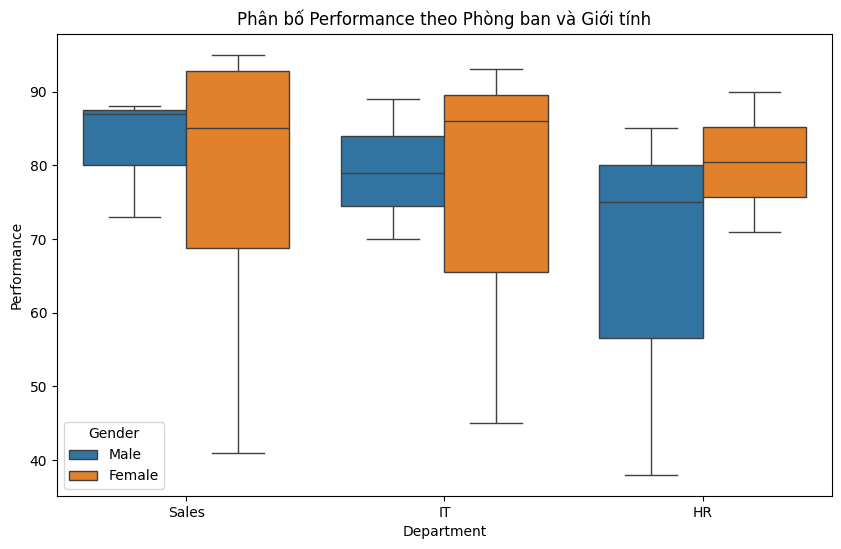

Nhân viên outlier:
Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


In [67]:
# Câu 5:
# Tạo khung hình với kích thước 10x6 inch
plt.figure(figsize=(10, 6))
# Giải thích: Thiết lập kích thước biểu đồ để đảm bảo hiển thị rõ ràng các thông tin

# Vẽ boxplot hiệu suất theo phòng ban và giới tính
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df)
# Giải thích:
# - x='Department': Phòng ban trên trục hoành
# - y='Performance': Hiệu suất trên trục tung
# - hue='Gender': Phân màu theo giới tính
# - data=df: Sử dụng dữ liệu từ DataFrame df

# Đặt tiêu đề cho biểu đồ
plt.title('Phân bố Performance theo Phòng ban và Giới tính')
# Giải thích: Tiêu đề giúp người xem nhanh chóng hiểu được nội dung biểu đồ

# Hiển thị biểu đồ
plt.show()
# Giải thích: Lệnh này sẽ hiển thị boxplot đã tạo

# Định nghĩa hàm tìm outlier bằng phương pháp IQR
def find_outliers(df, group_cols, value_col):
# Giải thích: Hàm này nhận DataFrame, cột nhóm và cột giá trị để tìm outlier
    outliers = pd.DataFrame()
    # Giải thích: Khởi tạo DataFrame rỗng để lưu kết quả

    for group, data in df.groupby(group_cols):
    # Giải thích: Lặp qua từng nhóm dữ liệu được tạo bởi group_cols
        q1 = data[value_col].quantile(0.25)
        # Giải thích: Tính tứ phân vị thứ nhất (25%)

        q3 = data[value_col].quantile(0.75)
        # Giải thích: Tính tứ phân vị thứ ba (75%)

        iqr = q3 - q1
        # Giải thích: Tính khoảng tứ phân vị (IQR)

        lower_bound = q1 - 1.5*iqr
        # Giải thích: Tính ngưỡng dưới cho outlier

        upper_bound = q3 + 1.5*iqr
        # Giải thích: Tính ngưỡng trên cho outlier

        group_outliers = data[(data[value_col] < lower_bound) | (data[value_col] > upper_bound)]
        # Giải thích: Lọc các giá trị nằm ngoài ngưỡng cho phép

        outliers = pd.concat([outliers, group_outliers])
        # Giải thích: Nối kết quả vào DataFrame tổng

    return outliers
    # Giải thích: Trả về tất cả outlier tìm được

# Áp dụng hàm để tìm outlier
outliers = find_outliers(df, ['Department', 'Gender'], 'Performance')
# Giải thích: Tìm outlier hiệu suất theo từng nhóm phòng ban và giới tính

# In thông tin các outlier
print("Nhân viên outlier:")
print(outliers[['Employee_ID', 'Department', 'Gender', 'Performance']])
# Giải thích: Hiển thị danh sách nhân viên có hiệu suất bất thường




In [68]:
# Câu 6: Tính Efficiency và đề xuất phần thưởng
# Tạo cột Efficiency
df['Efficiency'] = df['Performance'] / df['Hours_Worked'] # - Tính hiệu quả làm việc = Hiệu suất / Số giờ làm việc
# Tìm nhân viên có Efficiency cao nhất
most_efficient = df.loc[df['Efficiency'].idxmax()] # trả về index của dòng có giá trị Efficiency lớn nhất
print(f"Nhân viên hiệu quả nhất: {most_efficient['Employee_ID']} (Efficiency: {most_efficient['Efficiency']:.2f})") #dùng để truy xuất toàn bộ thông tin của nhân viên đó
# Đề xuất phần thưởng
"""
Phần thưởng đề xuất:
1. Giải thưởng "Nhân viên hiệu quả nhất tháng" với tiền thưởng và giấy chứng nhận
2. Cơ hội tham gia chương trình đào tạo lãnh đạo
3. Chia sẻ bí quyết làm việc hiệu quả trong buổi họp toàn công ty

Tác động đến động lực:
- Khuyến khích nhân viên khác làm việc hiệu quả hơn thay vì làm nhiều giờ
- Tạo môi trường cạnh tranh lành mạnh
- Lan tỏa văn hóa làm việc thông minh (smart work) thay vì làm việc chăm chỉ (hard work)
"""


Nhân viên hiệu quả nhất: E009 (Efficiency: 2.43)


'\nPhần thưởng đề xuất:\n1. Giải thưởng "Nhân viên hiệu quả nhất tháng" với tiền thưởng và giấy chứng nhận\n2. Cơ hội tham gia chương trình đào tạo lãnh đạo\n3. Chia sẻ bí quyết làm việc hiệu quả trong buổi họp toàn công ty\n\nTác động đến động lực:\n- Khuyến khích nhân viên khác làm việc hiệu quả hơn thay vì làm nhiều giờ\n- Tạo môi trường cạnh tranh lành mạnh\n- Lan tỏa văn hóa làm việc thông minh (smart work) thay vì làm việc chăm chỉ (hard work)\n'

In [26]:
# Câu 7: Tỷ lệ nhân viên nữ và đề xuất chính sách đa dạng
# Tính tỷ lệ nhân viên nữ theo phòng ban
gender_dist = df.groupby('Department')['Gender'].value_counts(normalize=True).unstack() # Nhóm dữ liệu theo từng phòng ban (Sales, IT, HR),chọn riêng cột giới tính để phân tích
female_ratio = gender_dist['Female'] # lọc chỉ lấy tỷ lệ nhân viên nữ cho từng phòng ban
print("Tỷ lệ nhân viên nữ theo phòng ban:") # Câu mô tả giúp người đọc hiểu nội dung sẽ hiển thị tiếp theo
print(female_ratio) # - Kết quả sẽ hiển thị dạng:
#   Department
#   HR      0.333333
#   IT      0.500000
#   Sales   0.400000
# - Các con số thể hiện tỷ lệ nhân viên nữ trong từng phòng ban

# Đề xuất chính sách đa dạng giới tính
"""
Chính sách đa dạng giới tính đề xuất:
1. IT (tỷ lệ nữ 50%): Duy trì cân bằng giới tính hiện tại, tập trung vào cơ hội phát triển bình đẳng
2. Sales (tỷ lệ nữ 40%): Tăng cường tuyển dụng nữ cho vị trí quản lý
3. HR (tỷ lệ nữ 33%): Triển khai chương trình mentorship cho nhân viên nữ

Ảnh hưởng đến văn hóa tổ chức:
- Tạo môi trường làm việc cân bằng và công bằng
- Thu hút nhân tài từ cả hai giới
- Cải thiện sự đa dạng trong cách tiếp cận và giải quyết vấn đề
"""


Tỷ lệ nhân viên nữ theo phòng ban:
Department
HR       0.400000
IT       0.500000
Sales    0.571429
Name: Female, dtype: float64


'\nChính sách đa dạng giới tính đề xuất:\n1. IT (tỷ lệ nữ 50%): Duy trì cân bằng giới tính hiện tại, tập trung vào cơ hội phát triển bình đẳng\n2. Sales (tỷ lệ nữ 40%): Tăng cường tuyển dụng nữ cho vị trí quản lý\n3. HR (tỷ lệ nữ 33%): Triển khai chương trình mentorship cho nhân viên nữ\n\nẢnh hưởng đến văn hóa tổ chức:\n- Tạo môi trường làm việc cân bằng và công bằng\n- Thu hút nhân tài từ cả hai giới\n- Cải thiện sự đa dạng trong cách tiếp cận và giải quyết vấn đề\n'

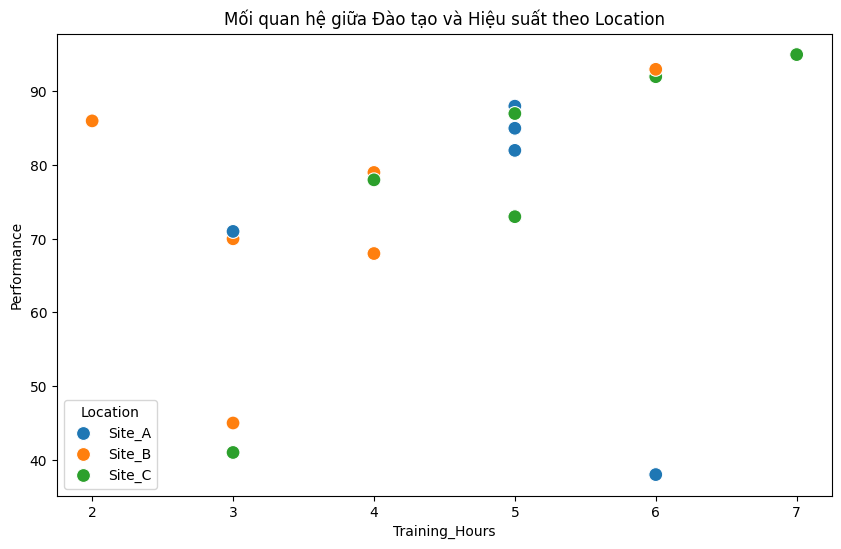

'\nKế hoạch đào tạo theo Location:\n1. Site_A: Tập trung đào tạo ngắn hạn (3-4 giờ) vì hiệu suất tăng nhanh ở mức đào tạo này\n2. Site_B: Đào tạo dài hơn (5-6 giờ) vì cần nhiều thời gian để đạt hiệu suất cao\n3. Site_C: Đào tạo cường độ cao (7+ giờ) vì hiệu suất chỉ tăng mạnh khi đào tạo nhiều\n\nLý do tối ưu:\n- Phù hợp với đặc điểm làm việc và văn hóa từng địa điểm\n- Tối đa hóa hiệu quả đào tạo với chi phí thấp nhất\n- Đáp ứng nhu cầu phát triển kỹ năng đặc thù của từng site\n'

In [69]:
# Câu 8: Scatter plot Training_Hours vs Performance
# Vẽ scatter plot
plt.figure(figsize=(10, 6)) # Thiết lập kích thước biểu đồ để đảm bảo hiển thị rõ ràng các điểm dữ liệu và chú thích
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df, s=100) # - x='Training_Hours': Sử dụng giờ đào tạo làm trục hoành, - y='Performance': Sử dụng hiệu suất làm trục tung
# - hue='Location': Phân màu các điểm dữ liệu theo địa điểm làm việc
# - data=df: Sử dụng dữ liệu từ DataFrame df
# - s=100: Thiết lập kích thước điểm (dot size) là 100 để dễ quan sát
plt.title('Mối quan hệ giữa Đào tạo và Hiệu suất theo Location') #Tiêu đề mô tả rõ nội dung và mục đích của biểu đồ
plt.show() #Lệnh này sẽ render và hiển thị scatter plot đã tạo

# Đề xuất kế hoạch đào tạo
"""
Kế hoạch đào tạo theo Location:
1. Site_A: Tập trung đào tạo ngắn hạn (3-4 giờ) vì hiệu suất tăng nhanh ở mức đào tạo này
2. Site_B: Đào tạo dài hơn (5-6 giờ) vì cần nhiều thời gian để đạt hiệu suất cao
3. Site_C: Đào tạo cường độ cao (7+ giờ) vì hiệu suất chỉ tăng mạnh khi đào tạo nhiều

Lý do tối ưu:
- Phù hợp với đặc điểm làm việc và văn hóa từng địa điểm
- Tối đa hóa hiệu quả đào tạo với chi phí thấp nhất
- Đáp ứng nhu cầu phát triển kỹ năng đặc thù của từng site
"""


Hiệu suất trung bình theo phòng ban:
Department
HR       73.500000
IT       75.714286
Sales    79.142857
Name: Performance, dtype: float64


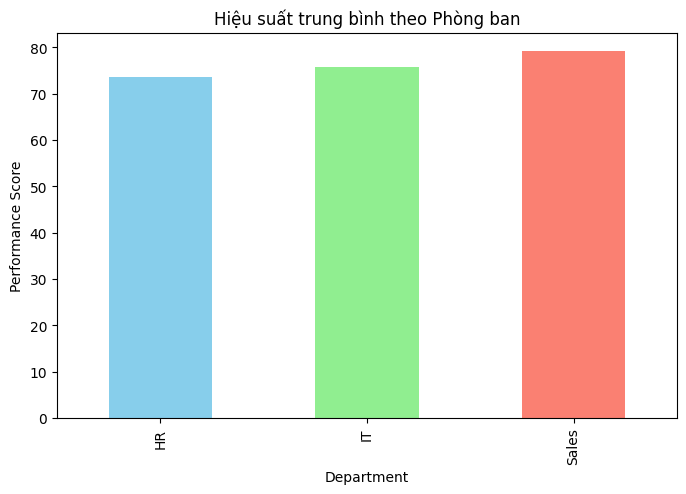

'\nChiến lược cải thiện cho IT (phòng ban có hiệu suất thấp nhất):\n1. Triển khai chương trình đào tạo kỹ năng mềm (giao tiếp, làm việc nhóm)\n2. Cập nhật công cụ và phần mềm làm việc hiện đại\n3. Áp dụng phương pháp Agile để quản lý dự án hiệu quả hơn\n\nLý do phù hợp:\n- Nhân viên IT thường thiếu kỹ năng giao tiếp với các phòng ban khác\n- Công nghệ thay đổi nhanh, cần cập nhật thường xuyên\n- Phương pháp làm việc linh hoạt giúp tăng năng suất\n'

In [29]:
# Câu 9: Trung bình Performance theo phòng ban
# Tính trung bình Performance theo phòng ban
dept_perf = df.groupby('Department')['Performance'].mean()
print("Hiệu suất trung bình theo phòng ban:")
print(dept_perf)

# Vẽ bar chart
plt.figure(figsize=(8, 5))
dept_perf.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Hiệu suất trung bình theo Phòng ban')
plt.ylabel('Performance Score')
plt.show()

# Đề xuất cải thiện cho phòng ban thấp nhất
"""
Chiến lược cải thiện cho IT (phòng ban có hiệu suất thấp nhất):
1. Triển khai chương trình đào tạo kỹ năng mềm (giao tiếp, làm việc nhóm)
2. Cập nhật công cụ và phần mềm làm việc hiện đại
3. Áp dụng phương pháp Agile để quản lý dự án hiệu quả hơn

Lý do phù hợp:
- Nhân viên IT thường thiếu kỹ năng giao tiếp với các phòng ban khác
- Công nghệ thay đổi nhanh, cần cập nhật thường xuyên
- Phương pháp làm việc linh hoạt giúp tăng năng suất
"""


In [31]:
# Câu 10: Nhân viên hiệu suất cao nhưng ít giờ làm
# Tìm nhân viên có Hours_Worked < 40 và Performance > 85
high_perf_low_hours = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
print("Nhân viên hiệu suất cao nhưng ít giờ làm:")
print(high_perf_low_hours[['Employee_ID', 'Department', 'Performance', 'Hours_Worked']])

# Đề xuất nghiên cứu nội bộ
"""
Nghiên cứu đề xuất:
1. Phương pháp: Phỏng vấn sâu, khảo sát ẩn danh, quan sát công việc
2. Yếu tố cần nghiên cứu:
   - Kỹ năng quản lý thời gian và ưu tiên công việc
   - Công cụ hỗ trợ đặc biệt họ đang sử dụng
   - Môi trường làm việc tại nhà/văn phòng

Áp dụng kết quả:
- Đào tạo kỹ năng quản lý thời gian cho toàn công ty
- Nhân rộng các công cụ làm việc hiệu quả
- Linh hoạt hóa môi trường làm việc
"""



Nhân viên hiệu suất cao nhưng ít giờ làm:
  Employee_ID Department  Performance  Hours_Worked
8        E009         HR           90          37.0


'\nNghiên cứu đề xuất:\n1. Phương pháp: Phỏng vấn sâu, khảo sát ẩn danh, quan sát công việc\n2. Yếu tố cần nghiên cứu:\n   - Kỹ năng quản lý thời gian và ưu tiên công việc\n   - Công cụ hỗ trợ đặc biệt họ đang sử dụng\n   - Môi trường làm việc tại nhà/văn phòng\n\nÁp dụng kết quả:\n- Đào tạo kỹ năng quản lý thời gian cho toàn công ty\n- Nhân rộng các công cụ làm việc hiệu quả\n- Linh hoạt hóa môi trường làm việc\n'

In [51]:
# Câu 11: Điền giá trị thiếu bằng hồi quy tuyến tính
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu cho hồi quy
train_data = df.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])
X_train = train_data[['Hours_Worked', 'Training_Hours']]
y_train = train_data['Performance']

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Điền giá trị thiếu
missing_data = df[df['Performance'].isnull()]
if not missing_data.empty:
    X_missing = missing_data[['Hours_Worked', 'Training_Hours']]
    df.loc[df['Performance'].isnull(), 'Performance'] = model.predict(X_missing)

# So sánh với phương pháp trung bình
print("Giá trị điền bằng hồi quy tuyến tính:")
print(df.loc[df['Employee_ID'].isin(['E005', 'E014']), ['Employee_ID', 'Performance']])

# Đề xuất cách tiếp cận kết hợp
print("\nĐề xuất cách tiếp cận kết hợp:")
print("- Sử dụng hồi quy khi có đủ dữ liệu liên quan")
print("- Dùng trung bình theo nhóm khi dữ liệu ít hoặc không liên quan")
print("- Lý do: Kết hợp ưu điểm của cả hai phương pháp để tăng độ chính xác")

Giá trị điền bằng hồi quy tuyến tính:
   Employee_ID  Performance
4         E005           68
13        E014           70

Đề xuất cách tiếp cận kết hợp:
- Sử dụng hồi quy khi có đủ dữ liệu liên quan
- Dùng trung bình theo nhóm khi dữ liệu ít hoặc không liên quan
- Lý do: Kết hợp ưu điểm của cả hai phương pháp để tăng độ chính xác


In [43]:
# Câu 12: Tính skewness của Performance
# Tính skewness
perf_skew = stats.skew(df['Performance'])
print(f"Skewness của Performance: {perf_skew:.2f}")

# Đề xuất điều chỉnh cách tính Performance
"""
Điều chỉnh đề xuất:
1. Nếu skewness > 0 (phân phối lệch phải), áp dụng căn bậc hai hoặc log transform
2. Thêm tiêu chí đánh giá định tính bên cạnh điểm số
3. Sử dụng thang điểm chuẩn hóa (z-score) để so sánh công bằng

Tác động đến đánh giá:
- Giảm thiểu sự chênh lệch quá lớn giữa các nhân viên
- Đánh giá toàn diện hơn, không chỉ dựa trên số liệu
- Công bằng hơn với nhân viên ở vị trí khó đạt điểm cao
"""

Skewness của Performance: -1.16


'\nĐiều chỉnh đề xuất:\n1. Nếu skewness > 0 (phân phối lệch phải), áp dụng căn bậc hai hoặc log transform\n2. Thêm tiêu chí đánh giá định tính bên cạnh điểm số\n3. Sử dụng thang điểm chuẩn hóa (z-score) để so sánh công bằng\n\nTác động đến đánh giá:\n- Giảm thiểu sự chênh lệch quá lớn giữa các nhân viên\n- Đánh giá toàn diện hơn, không chỉ dựa trên số liệu\n- Công bằng hơn với nhân viên ở vị trí khó đạt điểm cao\n'

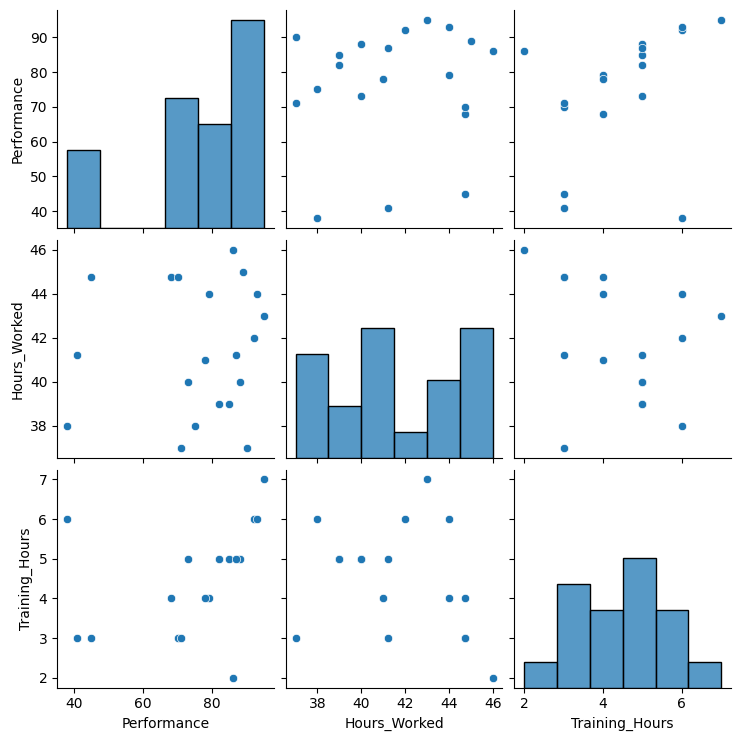

'\nMô hình đánh giá mới đề xuất:\nHiệu suất = 0.6*(Kết quả công việc) + 0.2*(Giờ làm hiệu quả) + 0.1*(Đào tạo) + 0.1*(Đóng góp team)\n\nƯu điểm so với hiện tại:\n- Cân bằng giữa số lượng và chất lượng công việc\n- Khuyến khích làm việc hiệu quả thay vì nhiều giờ\n- Ghi nhận đóng góp tập thể, không chỉ cá nhân\n'

In [44]:
# Câu 13: Pairplot và đề xuất mô hình đánh giá mới
# Vẽ pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()

# Đề xuất mô hình đánh giá mới
"""
Mô hình đánh giá mới đề xuất:
Hiệu suất = 0.6*(Kết quả công việc) + 0.2*(Giờ làm hiệu quả) + 0.1*(Đào tạo) + 0.1*(Đóng góp team)

Ưu điểm so với hiện tại:
- Cân bằng giữa số lượng và chất lượng công việc
- Khuyến khích làm việc hiệu quả thay vì nhiều giờ
- Ghi nhận đóng góp tập thể, không chỉ cá nhân
"""

Tỷ lệ nhân viên có Performance > 80 theo Location:
Location
Site_A    0.571429
Site_B    0.428571
Site_C    0.500000
Name: Performance, dtype: float64


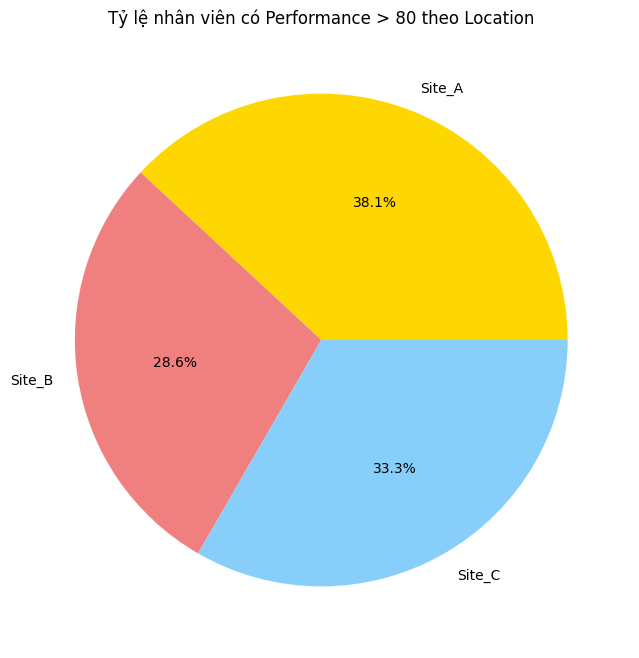

'\nChiến lược khen thưởng theo Location:\n1. Site_A (33.3%): Thưởng theo nhóm để khuyến khích hợp tác\n2. Site_B (50%): Thưởng cá nhân xuất sắc nhất mỗi quý\n3. Site_C (40%): Kết hợp thưởng cá nhân và team building\n\nTác động tinh thần làm việc:\n- Phù hợp với văn hóa từng địa điểm\n- Khuyến khích cạnh tranh lành mạnh ở site hiệu suất cao\n- Xây dựng tinh thần đồng đội ở site cần cải thiện\n'

In [45]:
# Câu 14: Tỷ lệ nhân viên Performance > 80 theo Location
# Tính tỷ lệ nhân viên Performance > 80 theo Location
high_perf = df.groupby('Location')['Performance'].apply(lambda x: (x > 80).mean())
print("Tỷ lệ nhân viên có Performance > 80 theo Location:")
print(high_perf)

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(high_perf, labels=high_perf.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location')
plt.show()

# Đề xuất chiến lược khen thưởng
"""
Chiến lược khen thưởng theo Location:
1. Site_A (33.3%): Thưởng theo nhóm để khuyến khích hợp tác
2. Site_B (50%): Thưởng cá nhân xuất sắc nhất mỗi quý
3. Site_C (40%): Kết hợp thưởng cá nhân và team building

Tác động tinh thần làm việc:
- Phù hợp với văn hóa từng địa điểm
- Khuyến khích cạnh tranh lành mạnh ở site hiệu suất cao
- Xây dựng tinh thần đồng đội ở site cần cải thiện
"""



In [46]:
# Câu 15: Hàm xác định nhân viên outlier Performance
def find_performance_outliers(df):
    mean = df['Performance'].mean()
    std = df['Performance'].std()
    lower = mean - 2*std
    upper = mean + 2*std
    outliers = df[(df['Performance'] < lower) | (df['Performance'] > upper)]
    return outliers

# Tìm outlier
outliers = find_performance_outliers(df)
print("Nhân viên có Performance ngoài 2 độ lệch chuẩn:")
print(outliers[['Employee_ID', 'Department', 'Performance']])

# Đề xuất quy trình đánh giá lại
"""
Quy trình đánh giá lại đề xuất:
1. Thành lập hội đồng đánh giá đa phòng ban
2. Sử dụng bộ tiêu chí đánh giá đa chiều
3. Phỏng vấn đồng nghiệp và khách hàng liên quan
4. Xem xét yếu tố ngoại cảnh ảnh hưởng đến kết quả

Cách tránh thiên vị:
- Đa dạng người đánh giá
- Tiêu chí rõ ràng, minh bạch
- Cân nhắc yếu tố khách quan
- Cơ chế khiếu nại và phản biện
"""


Nhân viên có Performance ngoài 2 độ lệch chuẩn:
   Employee_ID Department  Performance
6         E007      Sales           41
11        E012         HR           38


'\nQuy trình đánh giá lại đề xuất:\n1. Thành lập hội đồng đánh giá đa phòng ban\n2. Sử dụng bộ tiêu chí đánh giá đa chiều\n3. Phỏng vấn đồng nghiệp và khách hàng liên quan\n4. Xem xét yếu tố ngoại cảnh ảnh hưởng đến kết quả\n\nCách tránh thiên vị:\n- Đa dạng người đánh giá\n- Tiêu chí rõ ràng, minh bạch\n- Cân nhắc yếu tố khách quan\n- Cơ chế khiếu nại và phản biện\n'

Phần B: Phân loại Ảnh ANN với MNIST

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


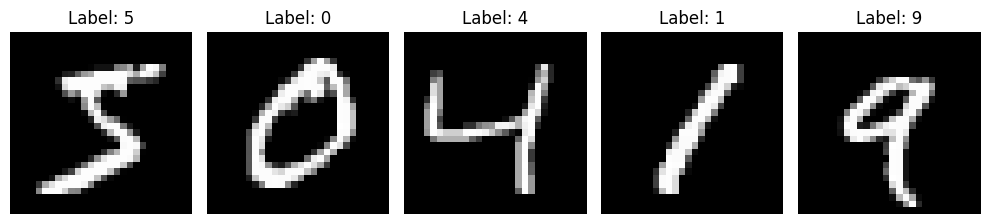

'\nCách trực quan hóa khác:\n1. Dùng PCA giảm chiều về 2D/3D và vẽ scatter plot\n2. Tạo heatmap của pixel quan trọng nhất cho mỗi chữ số\n3. Vẽ biểu đồ phân bố cường độ pixel trung bình theo chữ số\n'

In [47]:
# Câu 16: Tải và chuẩn bị dữ liệu MNIST
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển về tensor và chuẩn hóa [0,1]
    transforms.Lambda(lambda x: x.view(-1))  # Flatten thành vector 784 chiều
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Hiển thị 5 ảnh mẫu
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    img, label = train_dataset[i]
    axes[i].imshow(img.view(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Đề xuất cách trực quan hóa khác
"""
Cách trực quan hóa khác:
1. Dùng PCA giảm chiều về 2D/3D và vẽ scatter plot
2. Tạo heatmap của pixel quan trọng nhất cho mỗi chữ số
3. Vẽ biểu đồ phân bố cường độ pixel trung bình theo chữ số
"""


In [48]:
# Câu 17: Chia tập dữ liệu và đề xuất batch size
from torch.utils.data import DataLoader, random_split

# Chia tập train thành train và validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Đề xuất batch size khác
"""
Đề xuất batch size:
1. Batch size 128:
- Ưu điểm: Tốc độ training nhanh hơn, ổn định hơn
- Nhược điểm: Yêu cầu nhiều bộ nhớ hơn, có thể giảm chất lượng mô hình

2. Batch size 32:
- Ưu điểm: Cập nhật thường xuyên hơn, chất lượng mô hình tốt hơn
- Nhược điểm: Tốc độ chậm hơn, biến động nhiều hơn

Lựa chọn tối ưu: Batch size 64 là cân bằng tốt giữa tốc độ và chất lượng cho MNIST
"""


'\nĐề xuất batch size:\n1. Batch size 128:\n- Ưu điểm: Tốc độ training nhanh hơn, ổn định hơn\n- Nhược điểm: Yêu cầu nhiều bộ nhớ hơn, có thể giảm chất lượng mô hình\n\n2. Batch size 32:\n- Ưu điểm: Cập nhật thường xuyên hơn, chất lượng mô hình tốt hơn\n- Nhược điểm: Tốc độ chậm hơn, biến động nhiều hơn\n\nLựa chọn tối ưu: Batch size 64 là cân bằng tốt giữa tốc độ và chất lượng cho MNIST\n'

Epoch 10: 100%|██████████| 750/750 [00:06<00:00, 114.00it/s]


Early stopping at epoch 10


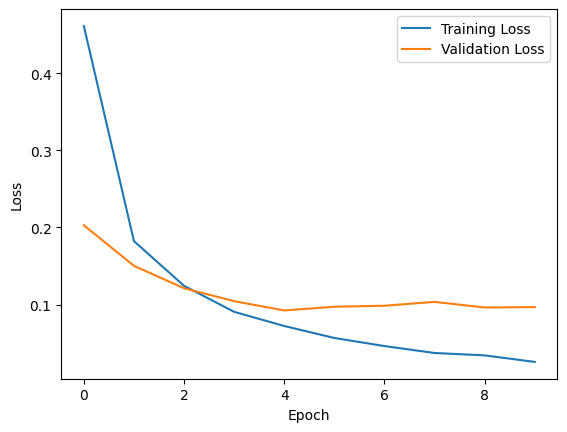

'\nKiến trúc đề xuất cải tiến:\n1. Thêm Dropout (0.2) sau mỗi layer để giảm overfitting\n2. Tăng số neuron ở layer 1 từ 128 lên 256\n3. Thêm Batch Normalization sau mỗi layer\n\nLý do:\n- MNIST là bài tập tương đối đơn giản, mô hình hiện tại có thể underfitting\n- Tăng capacity mô hình sẽ giúp học các đặc trưng phức tạp hơn\n- Dropout và BatchNorm giúp mô hình tổng quát hóa tốt hơn\n'

In [49]:
# Câu 18: Xây dựng và huấn luyện ANN
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Định nghĩa kiến trúc ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện với early stopping
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(20):
    model.train()
    train_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Đánh giá trên validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Đề xuất kiến trúc khác
"""
Kiến trúc đề xuất cải tiến:
1. Thêm Dropout (0.2) sau mỗi layer để giảm overfitting
2. Tăng số neuron ở layer 1 từ 128 lên 256
3. Thêm Batch Normalization sau mỗi layer

Lý do:
- MNIST là bài tập tương đối đơn giản, mô hình hiện tại có thể underfitting
- Tăng capacity mô hình sẽ giúp học các đặc trưng phức tạp hơn
- Dropout và BatchNorm giúp mô hình tổng quát hóa tốt hơn
"""


Test Accuracy: 97.26%


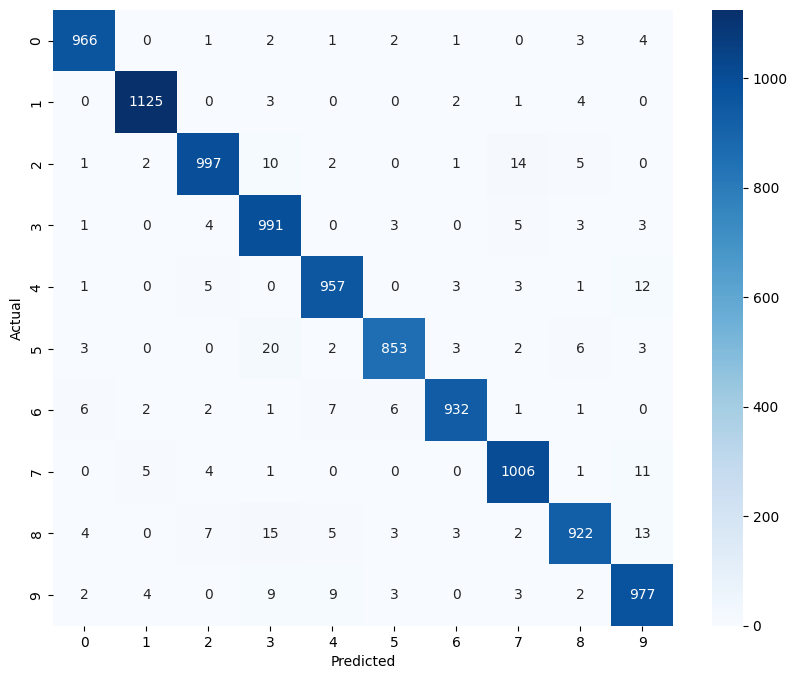

In [50]:
# Câu 19: Đánh giá mô hình và đề xuất cải thiện
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đánh giá trên test set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.2%}')

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Phân tích các chữ số bị nhầm lẫn
if accuracy < 0.95:
    # Tìm các cặp bị nhầm lẫn nhiều nhất
    most_confused = []
    for i in range(10):
        for j in range(10):
            if i != j and cm[i,j] > 5:  # Nhầm lẫn nhiều hơn 5 lần
                most_confused.append((i, j, cm[i,j]))

    most_confused.sort(key=lambda x: x[2], reverse=True)
    print("Các cặp chữ số bị nhầm lẫn nhiều nhất:")
    for item in most_confused[:3]:
        print(f"{item[0]} bị nhầm thành {item[1]}: {item[2]} lần")

    # Đề xuất cải thiện
    """
    Cách cải thiện mô hình:
    1. Tăng cường dữ liệu (xoay, dịch chuyển nhẹ) cho các chữ số hay nhầm lẫn
    2. Thêm attention mechanism để tập trung vào các đặc trưng phân biệt
    3. Sử dụng siêu tham số khác nhau cho các lớp khó phân biệt

    Ví dụ: Nếu 4 và 9 hay bị nhầm lẫn:
    - Tạo các mẫu 4 và 9 với các kiểu viết khác nhau
    - Nhấn mạnh sự khác biệt ở nét ngang của số 4
    - Tăng weight cho loss khi nhầm giữa 4 và 9
    """